In [1]:
import numpy as np
import matplotlib.pyplot as plt

from traffic_signaling.city_plan import *
from traffic_signaling.data import *

In [2]:
def path_duration(path):
    # The car path begins at the end of the first street
    return sum(street.length for street in path[1:])

def car_summary(plan):
    streets = np.array(plan.streets)
    path_durations = np.array([path_duration(streets[car.path]) for car in plan.cars])
    paths_in_time = path_durations[path_durations <= plan.duration]

    print('Cars that can finish in time: '
          f'{len(paths_in_time)}/{len(plan.cars)} '
          f'({100 * len(paths_in_time) / len(plan.cars):.2f}%)')


In [3]:
def intersection_summary(plan):
    intersections_used = len([i for i in plan.intersections if i.used])

    # Intersections with non-trivial schedule
    intersections_with_schedule = len([i for i in plan.intersections if i.non_trivial])
    intersections_one_street_used = intersections_used - intersections_with_schedule

    print('Intersections used: '
          f'{intersections_used}/{len(plan.intersections)} '
          f'({100 * intersections_used / len(plan.intersections):.2f}%)')
    print('Intersections with exactly one street used: '
          f'{intersections_one_street_used}/{len(plan.intersections)} '
          f'({100 * intersections_one_street_used / len(plan.intersections):.2f}%)')
    print('Intersections with non-trivial schedule: '
          f'{intersections_with_schedule}/{len(plan.intersections)} '
          f'({100 * intersections_with_schedule / len(plan.intersections):.2f}%)')


In [4]:
def street_summary(plan):
    streets_used = [street for street in plan.streets if street.used]
    print('Used streets: '
          f'{len(streets_used)}/{len(plan.streets)} '
          f'({100 * len(streets_used) / len(plan.streets):.2f}%)')

In [5]:
def upper_bound(plan):
    """
    Theoretical maximum score if none of the cars ever has to wait at a traffic light.
    """
    streets = np.array(plan.streets)
    path_durations = np.array([path_duration(streets[car.path]) for car in plan.cars])
    score = np.sum(plan.duration - path_durations + plan.bonus)
    print(f'Upper bound of the score: {score:,}')
    return score

In [6]:
def car_histogram(plan):
    # used streets from intersections with non-trivial schedule
    streets = plan.streets
    street_ids = [streets[s].id for i in plan.intersections if i.non_trivial for s in i.incoming_streets if streets[s].used]
    car_counts = np.zeros(len(plan.streets))
    for car in plan.cars:
        car_counts[car.path[:-1]] += 1

    #np.histogram(car_counts[street_ids])
    values, counts = np.unique(car_counts[street_ids], return_counts=True)
    values = values.astype(int)
    print(f'Values: {values}')
    print(f'Counts: {counts}')

    plt.bar(values, counts)
    plt.title('Number of cars passing through a street')
    plt.xlabel('Cars passing through')
    plt.ylabel('Number of streets')

    plt.show()


In [7]:
def street_histogram(plan, xscale='linear'):
    streets = plan.streets
    non_trivial_incoming_counts = [len([s for s in i.incoming_streets if streets[s].used]) 
                       for i in plan.intersections if i.non_trivial]
    values, counts = np.unique(non_trivial_incoming_counts, return_counts=True)
    values = values.astype(int)
    print(f'Values: {values}')
    print(f'Counts: {counts}')

    plt.bar(values, counts, color='green')
    plt.xscale(xscale)
    plt.xticks(values, values)
    #plt.yticks(counts, counts)
    plt.title('Number of used incoming streets streets to a non-trivial intersection')
    plt.xlabel('Used incoming streets streets')
    plt.ylabel('Non-trivial intersections')

    plt.show()

------------------------------- DATA a -------------------------------
Intersections used: 3/4 (75.00%)
Intersections with exactly one street used: 2/4 (50.00%)
Intersections with non-trivial schedule: 1/4 (25.00%)
Used streets: 4/5 (80.00%)
Cars that can finish in time: 2/2 (100.00%)
Upper bound of the score: 2,002
----------------------------------------------------------------------
Values: [1]
Counts: [2]


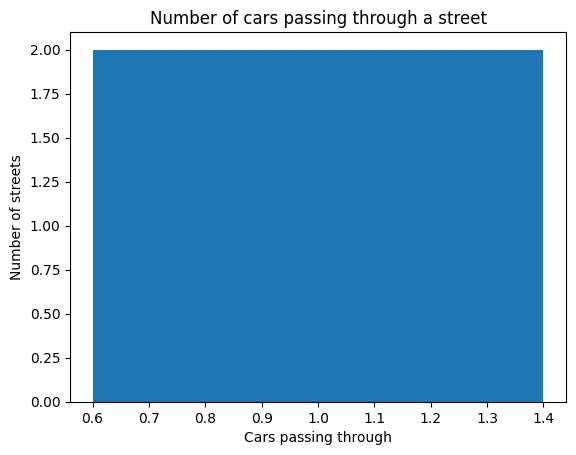

Values: [2]
Counts: [1]


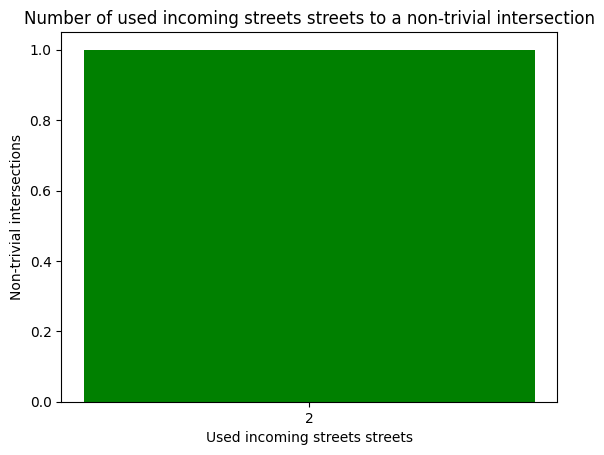

------------------------------- DATA b -------------------------------
Intersections used: 6296/7073 (89.01%)
Intersections with exactly one street used: 4977/7073 (70.37%)
Intersections with non-trivial schedule: 1319/7073 (18.65%)
Used streets: 7964/9102 (87.50%)
Cars that can finish in time: 1000/1000 (100.00%)
Upper bound of the score: 4,576,202
----------------------------------------------------------------------
Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
 26]
Counts: [1036  724  444  276  184  107   72   43   27   12   20    2    5    9
    6    5    2    4    2    2    1    1    1    1    1]


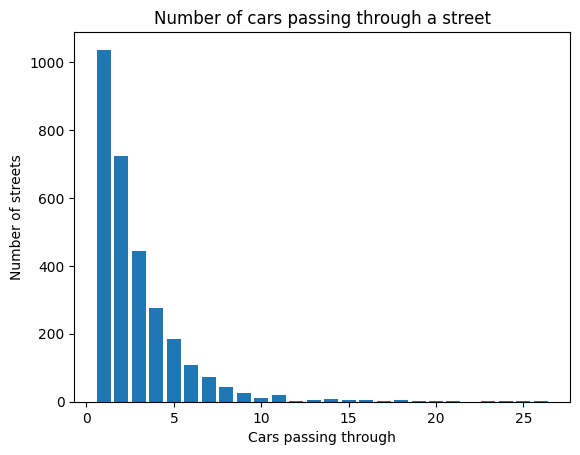

Values: [ 2  3  4  5  6  7  8 10]
Counts: [1068  185   50    8    4    2    1    1]


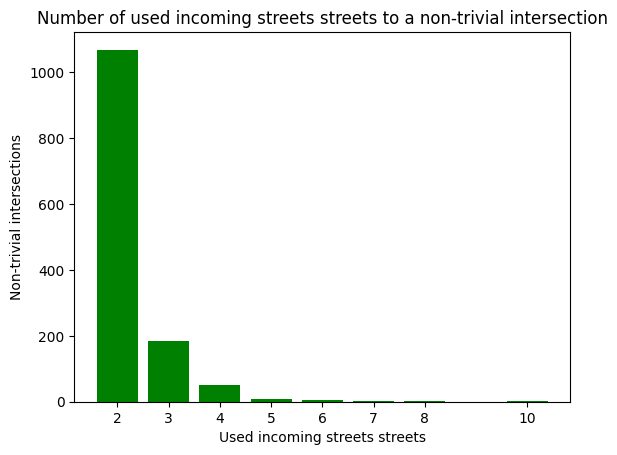

------------------------------- DATA c -------------------------------
Intersections used: 7660/10000 (76.60%)
Intersections with exactly one street used: 4468/10000 (44.68%)
Intersections with non-trivial schedule: 3192/10000 (31.92%)
Used streets: 11472/35030 (32.75%)
Cars that can finish in time: 1000/1000 (100.00%)
Upper bound of the score: 1,328,389
----------------------------------------------------------------------
Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 47 49 50 53
 57 65 66]
Counts: [2073  903  611  399  306  341  257  259  214  221  167  141  119  112
  108   85   69   77   65   70   51   64   47   25   40   31   24    7
   11   20   10   12   10    5    8    2    7    6    2    2    1    5
    3    2    6    1    1    1    1    1    1]


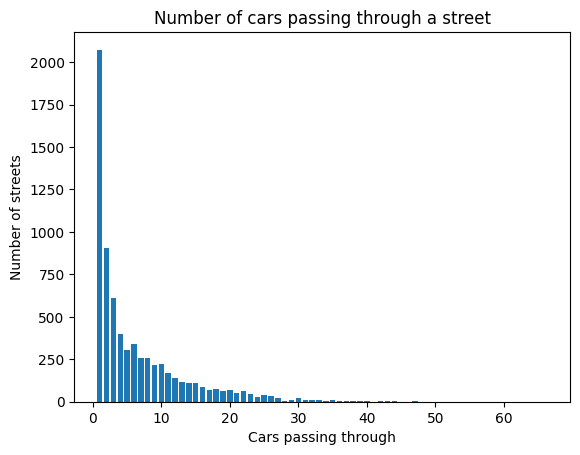

Values: [2 3 4]
Counts: [2621  522   49]


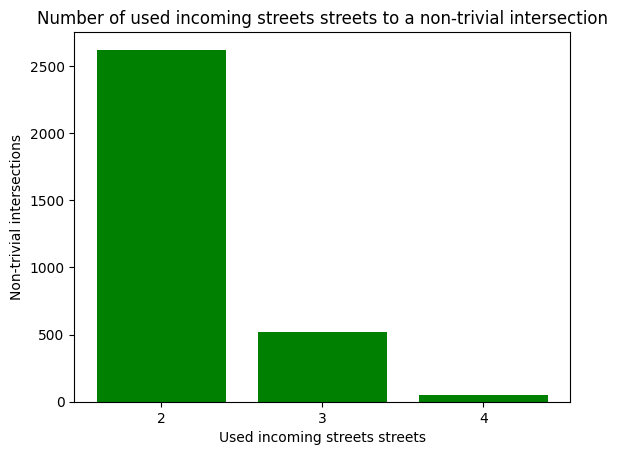

------------------------------- DATA d -------------------------------
Intersections used: 8000/8000 (100.00%)
Intersections with exactly one street used: 0/8000 (0.00%)
Intersections with non-trivial schedule: 8000/8000 (100.00%)
Used streets: 83874/95928 (87.43%)
Cars that can finish in time: 1000/1000 (100.00%)
Upper bound of the score: 3,986,591
----------------------------------------------------------------------
Values: [ 1  2  3  4  5  6  7  8  9 10 12]
Counts: [25067 25796 17904  9478  3743  1373   377   111    15     9     1]


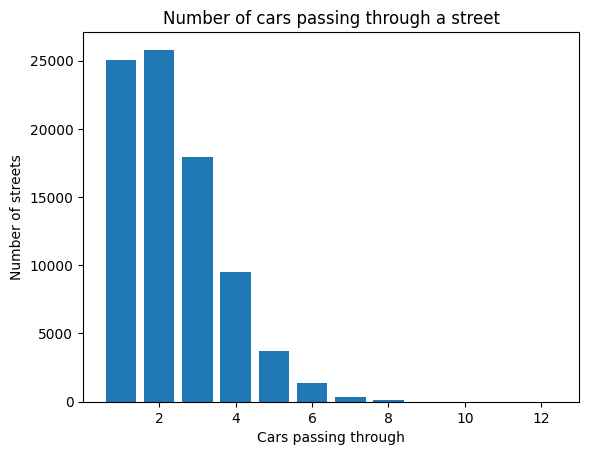

Values: [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72  73  74
  77  78  79  81  82  84  85  86  88  89  92  93  96  97  98 100 107 109
 115 117 118 120 121 132 137 145 147 158 169 173 177 180 188 200 235 240
 268 270]
Counts: [   4   56  293 1048 1681 1137  747  550  396  345  265  200  190  122
  102   82   79   86   59   42   35   38   36   33   33   23   23   20
   14   17   10   15   11   14   10    7    7    7    9    6    8    7
    6    5    4    3    4    3    6    1    2    2    5    1    2    2
    2    1    4    3    1    1    2    3    3    1    3    2    2    1
    1    1    2    3    1    2    1    2    2    2    2    2    2    1
    2    2    1    1    1    1    1    2    1    3    3    1    2    1
    1    1    1    1    1    1    1    

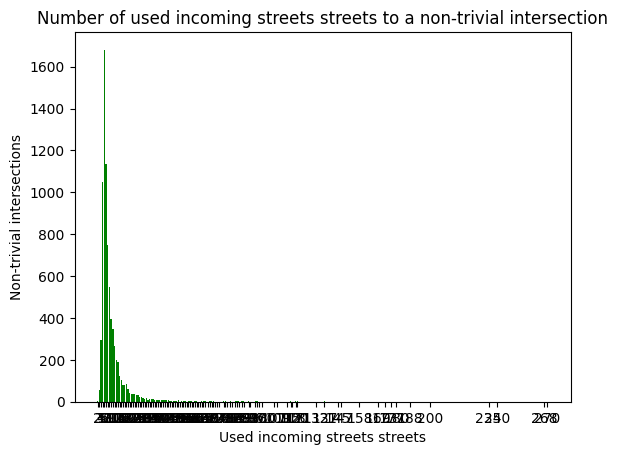

------------------------------- DATA e -------------------------------
Intersections used: 500/500 (100.00%)
Intersections with exactly one street used: 263/500 (52.60%)
Intersections with non-trivial schedule: 237/500 (47.40%)
Used streets: 956/998 (95.79%)
Cars that can finish in time: 1000/1000 (100.00%)
Upper bound of the score: 921,203
----------------------------------------------------------------------
Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15]
Counts: [ 94 131 127  99  77  42  40  24  20  22  10   3   2   2]


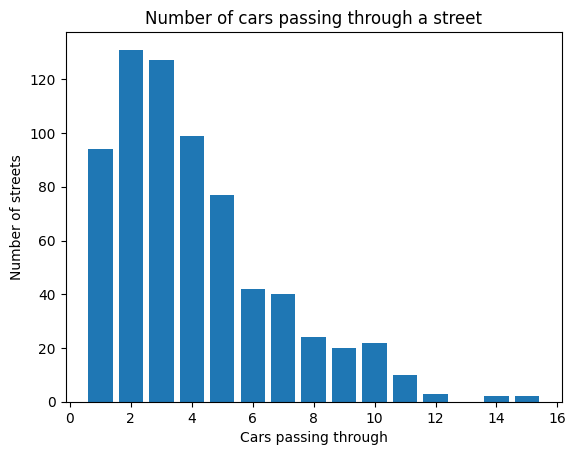

Values: [  2 221]
Counts: [236   1]


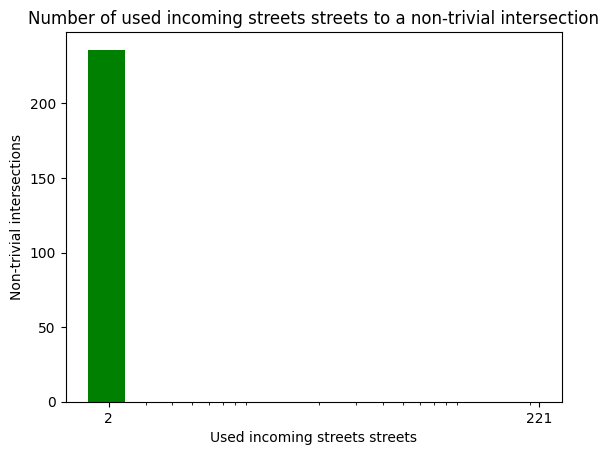

------------------------------- DATA f -------------------------------
Intersections used: 1632/1662 (98.19%)
Intersections with exactly one street used: 332/1662 (19.98%)
Intersections with non-trivial schedule: 1300/1662 (78.22%)
Used streets: 5333/10000 (53.33%)
Cars that can finish in time: 1000/1000 (100.00%)
Upper bound of the score: 1,765,068
----------------------------------------------------------------------
Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 127 128 130
 131 133 134 135 136 137 138 140 141 143 144 147 148 149 1

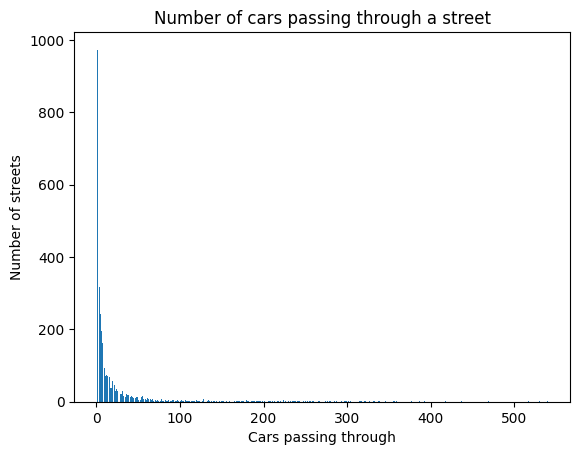

Values: [ 2  3  4  5  6  7  8  9 11]
Counts: [323 304 255 212 127  46  22   9   2]


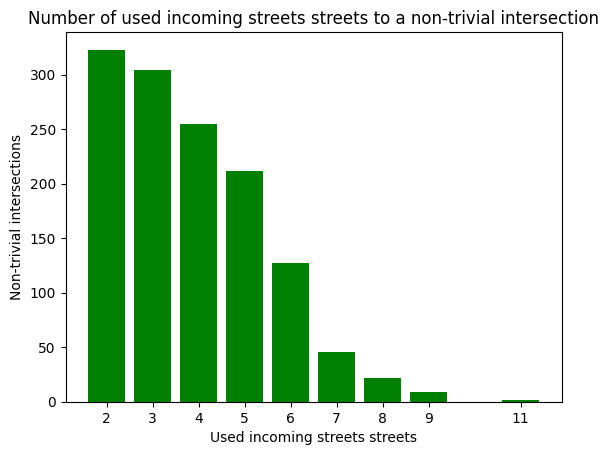

TOTAL UPPER BOUND: 12,579,455


In [8]:
upper_bounds = []
for data in TEST_DATA:
    plan = CityPlan(get_data_filename(data))
    print(f'{"-" * 31} DATA {data} {"-" * 31}')
    intersection_summary(plan)
    street_summary(plan)
    car_summary(plan)
    upper_bounds.append(upper_bound(plan))
    print('-' * 70)
    car_histogram(plan)
    if data == 'e':
        street_histogram(plan, xscale='log')
    else:
        street_histogram(plan)

print(f'TOTAL UPPER BOUND: {sum(upper_bounds):,}')